<a href="https://colab.research.google.com/github/KacaU-lab/CodersLab-Vizualization/blob/main/petrol_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

## Petrol prices in India

In this notebook we are going to discuss the collection of dataset available on the kaggle platform.

The data is published under the CC0 license on [this kaggle page](https://www.kaggle.com/syedjaferk/petrol-price-data-by-district).

Let's get familiar with the content of the notebook and follow the instructions to prepare the data that we are going to need during classes.

**Note!** When you come back to the document later, remember to re-run the code cells.

### Dataset contents

In this case we're importing information on:
*   **city** - where the corresponding price was recorded,
*   **date** - when the price was recorded,
*   **rate** - the price of petrol,
*   **district** - the part of India where the city is.



The necessary data is provided with the document: the code below imports the file.

In [2]:
# === 1) Připojit Google Drive a vyhledat soubor ===
from google.colab import drive
import glob, os, re

# Připojit disk
drive.mount('/content/drive', force_remount=False)

# Vyhledat soubor s názvem 'petrol_prices.csv'
candidates = glob.glob('/content/drive/**/petrol_prices.csv', recursive=True)

if not candidates:
    print("❌ Soubor s názvem 'petrol_prices.csv' nebyl nalezen. Zkontroluj, zda je nahraný na Google Disku.")
else:
    print("✅ Nalezené cesty:")
    for i, path in enumerate(sorted(candidates)):
        print(f"[{i}] {path}")

Mounted at /content/drive
✅ Nalezené cesty:
[0] /content/drive/MyDrive/Colab Notebooks/Vis/Petrol Prices/petrol_prices.csv


In [3]:
# === 2) Načtení datasetu ===
import pandas as pd

# Cesta k souboru (uprav podle výpisu výše)
PATH = "/content/drive/MyDrive/Colab Notebooks/Vis/Petrol Prices/petrol_prices.csv"

# Načtení CSV do DataFrame
petrol_prices = pd.read_csv(PATH)

# Výpis základních informací
print(f"[OK] Soubor načten: {PATH}")
print(f"Tvar: {petrol_prices.shape[0]} řádků × {petrol_prices.shape[1]} sloupců\n")

# Náhled dat
petrol_prices.head()

[OK] Soubor načten: /content/drive/MyDrive/Colab Notebooks/Vis/Petrol Prices/petrol_prices.csv
Tvar: 21684 řádků × 4 sloupců



,city,date,rate,district
0,Chittoor,2016-07-01,70.75,Andhra Pradesh
1,Chittoor,2016-07-15,68.43,Andhra Pradesh
2,Chittoor,2016-08-01,67.06,Andhra Pradesh
3,Chittoor,2016-08-15,66.08,Andhra Pradesh
4,Chittoor,2016-09-01,69.56,Andhra Pradesh


## Notebook preparation

We want to start by making sure that the data has been correctly identified and make necessary conversions.

Based on data overview, we expect that the first and last columns contain text-based data. We assume that the **date** column should only contain dates, and **rate** - only numeric values.

Let's check what the actual content of the set is.

### Checking data types

Below, we need to run the listed instructions to get the DataFrames used during classes.

Let's first check how the data was identified on import.

In [4]:
# === 3) Kontrola datových typů ===
petrol_prices.dtypes.to_frame(name="dtype")

,dtype
city,object
date,object
rate,float64
district,object


Not unlike with the other datasets, we need to verify if the data has records where any of the columns is missing information.

In [5]:
# === 4) Kontrola počtu kompletních a nekompletních záznamů ===
complete = petrol_prices.dropna(how="any").shape[0]
total = len(petrol_prices)

print(f"✅ Počet kompletních záznamů: {complete} / {total} (celkem)")

✅ Počet kompletních záznamů: 21684 / 21684 (celkem)


### Date conversion

In the **date** column, we need to convert the data so that it is correctly identified as dates.

In [8]:
# === 5) Konverze sloupce 'date' na datetime ===
petrol_prices["date"] = pd.to_datetime(petrol_prices["date"], errors="coerce")

# Ověření, že konverze proběhla úspěšně
print("[OK] Sloupec 'date' byl převeden na datetime typ.\n")
petrol_prices.dtypes.to_frame(name="dtype").loc[["date"]]

[OK] Sloupec 'date' byl převeden na datetime typ.



,dtype
date,datetime64[ns]


We should also check if all of the dates occur the same number of times in the set: if they don't we can expect that for some cities we don't have information for the entire period.

In [9]:
# === 6) Kontrola výskytu jednotlivých dat ===
date_counts = petrol_prices["date"].value_counts().sort_index()
print("[INFO] Počty záznamů pro jednotlivá data:")
display(date_counts.head())

# === Kontrola výskytu měst ===
city_counts = petrol_prices["city"].value_counts()
print("\n[INFO] Počty záznamů pro jednotlivá města:")
display(city_counts.head(10))

[INFO] Počty záznamů pro jednotlivá data:


,count
date,
2011-11-16,1
2011-12-01,1
2012-04-01,2
2012-05-24,4
2012-06-03,4



[INFO] Počty záznamů pro jednotlivá města:


,count
city,
Chandigarh,1044
Hyderabad,1036
Daman,964
Silvassa,964
Itanagar,920
Port Blair,916
Golaghat,880
Vizag,880
Guntur,880


### Identifying city names in the set

In [10]:
# === 7) Přehled počtu záznamů podle města ===
city_counts = petrol_prices["city"].value_counts(dropna=False)

print("[INFO] Přehled počtu záznamů podle měst:\n")
display(city_counts.head(15))

print(f"\nCelkový počet měst v datasetu: {len(city_counts)}")

[INFO] Přehled počtu záznamů podle měst:



,count
city,
Chandigarh,1044
Hyderabad,1036
Daman,964
Silvassa,964
Itanagar,920
Port Blair,916
Golaghat,880
Vizag,880
Guntur,880



Celkový počet měst v datasetu: 25


In [12]:
# === 8) Seskupení měst podle počtu záznamů (opraveno) ===
# 1) Spočítat záznamy podle města
city_counts = petrol_prices["city"].value_counts()  # NaN jsou defaultně vynechány

# 2) Převést na DF a seskupit podle 'count'
grouped_cities = (
    city_counts.rename_axis("city").reset_index(name="count")
               .groupby("count")["city"].apply(list)
               .sort_index(ascending=False)
)

print("[OK] Seskupená města podle počtu záznamů:\n")
for count, cities in grouped_cities.items():
    if count >= 800:  # zobraz jen delší časové řady
        names = ", ".join(map(str, cities))   # ← důležité: převod na str
        print(f"- {count} záznamů: {names}")

# Volitelně zobraz celou tabulku (TOP 10 různých počtů)
# display(grouped_cities.head(10))

[OK] Seskupená města podle počtu záznamů:

- 1044 záznamů: Chandigarh
- 1036 záznamů: Hyderabad
- 964 záznamů: Daman, Silvassa
- 920 záznamů: Itanagar
- 916 záznamů: Port Blair
- 880 záznamů: Golaghat, Vizag, Guntur, Araria, Ambikapur
- 876 záznamů: Dibrugarh, Nellore, Barpeta, Ongole, Machilipatnam, Eluru, Kurnool, Vizianagaram, Srikakulam, Anantapur, Kadapa, Kakinada
- 872 záznamů: Chittoor


Next, let's look at the contents of the **city** column.

Note that the set contains groups of cities with a similar number of observations. We can expect to have interesting results when we compare observations for:
*   Chandigarh and Hyderabad,
*   Silvassa and Daman,
*   Itanagar and Port Blair,
*   Vizag, Guntur, Araria, Golaghat and Ambikapur,
*   Groups of cities with 876 observations,

if we are dealing with similar periods.


### Identifying district names in the set

The next column we want to have a closer look at, is **district**.

In [13]:
# === 9) Přehled názvů distriktů ===
district_counts = petrol_prices["district"].value_counts(dropna=False)

print("[INFO] Počty záznamů podle distriktů:\n")
display(district_counts.head(15))
print(f"\nCelkový počet distriktů v datasetu: {len(district_counts)}")

[INFO] Počty záznamů podle distriktů:



,count
district,
Andhra Pradesh,12428
Assam,2632
Chandigarh,1044
Dadra and Nagar Haveli,964
Daman and Diu,964
Arunachal Pradesh,920
Andaman and Nicobar Islands,916
Chhattisgarh,880
Bihar,880



Celkový počet distriktů v datasetu: 10


in this case we'll change the type of data to a category.

In [14]:
# === 10) Převod 'district' na kategorickou proměnnou ===
petrol_prices["district"] = petrol_prices["district"].astype("category")

print("[OK] Sloupec 'district' byl převeden na kategorický typ.")
petrol_prices.dtypes.to_frame("dtype").loc[["district"]]

[OK] Sloupec 'district' byl převeden na kategorický typ.


,dtype
district,category


### Price statistics

Finally, let's look at the statistics of recorded prices.

[INFO] Přehled základních popisných statistik pro sloupec 'rate':



,rate
count,21684.000000
mean,77.714397
std,7.312926
min,48.600000
25%,73.650000
50%,77.150000
75%,83.620000
max,97.850000


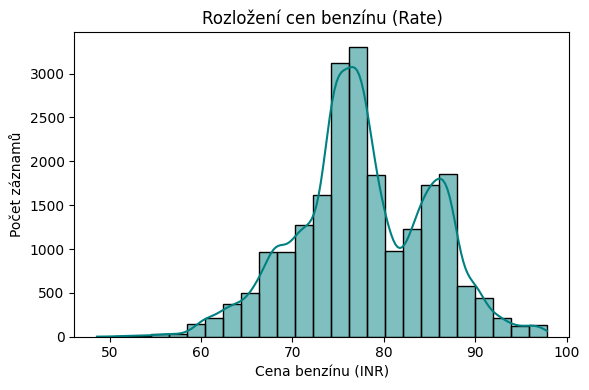

In [16]:
# Povinné importy pro grafy (doplň i po restartu kernelu)
import matplotlib.pyplot as plt
import seaborn as sns

# === 11) Základní statistiky cen benzínu ===
stats = petrol_prices["rate"].describe()
print("[INFO] Přehled základních popisných statistik pro sloupec 'rate':\n")
display(stats)

# Vizualizace rozložení cen
plt.figure(figsize=(6,4))
sns.histplot(petrol_prices["rate"], bins=25, kde=True, color="teal")
plt.title("Rozložení cen benzínu (Rate)")
plt.xlabel("Cena benzínu (INR)")
plt.ylabel("Počet záznamů")
plt.tight_layout()
plt.show()

## Exercises